In [1]:
# Import Modules
import pandas as pd
import numpy as np
from scipy import stats
from scipy.stats import sem
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties
from prettytable import PrettyTable

In [2]:
your_path = './Output/'

In [3]:
# initialization module

list_Price_Per_Unit = [330, 300, 270, 230]
list_Cost_Per_Unit = [200, 190, 175, 165]

multiplier = 0.50
list_Salvage_Per_Unit = list(np.array(list_Price_Per_Unit) * multiplier)

list_advert_intens = [5, 10, 15, 20, 25, 30]
list_Mean_Normal = [288, 938, 1306, 1691, 1940, 2243]
list_Std_Normal = [211, 262, 281, 308, 294, 289]
length1 = len(list_advert_intens)

list_of_orders = [500, 1000, 1500, 2000]
length2 = len(list_of_orders)

alfa = 0.5
confidence = 0.95  ## selected by the analyst

In [5]:
column_labels = ["Advert.Intens.", "Order Quantity",
                 "Mean", "Std.Dev", "Var.", "Std. Error",
                 "Median", "Skewness", "Kurtosis",
                 "CI Half Width", "CI LL", 'CI UL']

df = pd.DataFrame(columns=column_labels)

In [26]:
listM1, listM2, listM3, listM4, listM5, listM6 = [], [], [], [], [], []
list_of_Means = [listM1, listM2, listM3, listM4, listM5, listM6]

Number_of_Replications = 3000
for i in range(length1):
    for j in range(length2):
        list_of_profits = []
        for run in range(Number_of_Replications):

            Qty_Demanded = np.random.normal(loc=list_Mean_Normal[i], scale=list_Std_Normal[i], size=1)[0]

            if Qty_Demanded >= 0:
                # Qty_Demanded = int(Qty_Demanded)
                Qty_Demanded = np.floor(Qty_Demanded)
            else:
                Qty_Demanded = 0

            Qty_Ordered = list_of_orders[j]

            Qty_Sold = np.minimum(Qty_Demanded, Qty_Ordered)
            Qty_Left = np.maximum(0, Qty_Ordered - Qty_Demanded)

            Revenue_per_Sales = Qty_Sold * list_Price_Per_Unit[j]
            Revenue_per_Salvage = Qty_Left * list_Salvage_Per_Unit[j]

            Cost_per_Order = Qty_Ordered * list_Cost_Per_Unit[j]

            Cost_per_Advert = alfa * np.log(-1 / ((list_advert_intens[i] / 100) - 1))
            Cost_per_Advert = Cost_per_Advert * 100000

            Profit = Revenue_per_Sales + Revenue_per_Salvage - Cost_per_Order - Cost_per_Advert
            # print(f"{type(Qty_Demanded)=}")
            # print(f"{type(Revenue_per_Sales)=}\n{type(Revenue_per_Salvage)=}\n{type(Cost_per_Order)=}\n{type(Cost_per_Advert)=}\n{type(Profit)=}\n\n")            
            list_of_profits.append(Profit)
            
        # We used Numpy and Scipy to obtain a set of key descriptive statistical measures, particularly the expected value of the profits:
        media = np.mean(list_of_profits)
        stand = np.std(list_of_profits)
        var = np.var(list_of_profits)
        std_error = sem(list_of_profits)
        
        median = np.median(list_of_profits)
        
        # # Normalize the data
        # normalized_profits = (list_of_profits - np.mean(list_of_profits)) / np.std(list_of_profits)

        
        # Calculate the skewness and kurtosis
        skew = stats.skew(list_of_profits)
        kurt = stats.kurtosis(list_of_profits)
        
        dof = Number_of_Replications - 1
        t_crit = np.abs(stats.t.ppf((1 - confidence) / 2, dof))
        
        half_width = round(stand * t_crit / np.sqrt(Number_of_Replications), 2)
        inf = media - half_width
        sup = media + half_width
        
        inf = round(float(inf), 2)
        sup = round(float(sup), 2)
        
        list_of_statistics = []
        list_of_statistics.append(list_advert_intens[i])
        list_of_statistics.append(Qty_Ordered)
        list_of_statistics.append(round(media, 2))
        list_of_statistics.append(round(stand, 2))
        list_of_statistics.append(round(var, 2))
        list_of_statistics.append(round(float(std_error), 2))
        
        list_of_statistics.append(round(median, 2))
        list_of_statistics.append(round(float(skew), 2))
        list_of_statistics.append(round(float(kurt), 2))
        
        list_of_statistics.append(round(half_width, 2))
        list_of_statistics.append(round(inf, 2))
        list_of_statistics.append(round(sup, 2))
        
        df.loc[len(df)] = list_of_statistics
        
        list_of_Means[i].append(round(media, 2))

/tmp/ipykernel_67555/570264540.py:49: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  skew = stats.skew(list_of_profits)
/tmp/ipykernel_67555/570264540.py:50: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  kurt = stats.kurtosis(list_of_profits)
/tmp/ipykernel_67555/570264540.py:49: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  skew = stats.skew(list_of_profits)
/tmp/ipykernel_67555/570264540.py:50: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  kurt = stats.kurtosis(list_of_profits)
/tmp/ipy

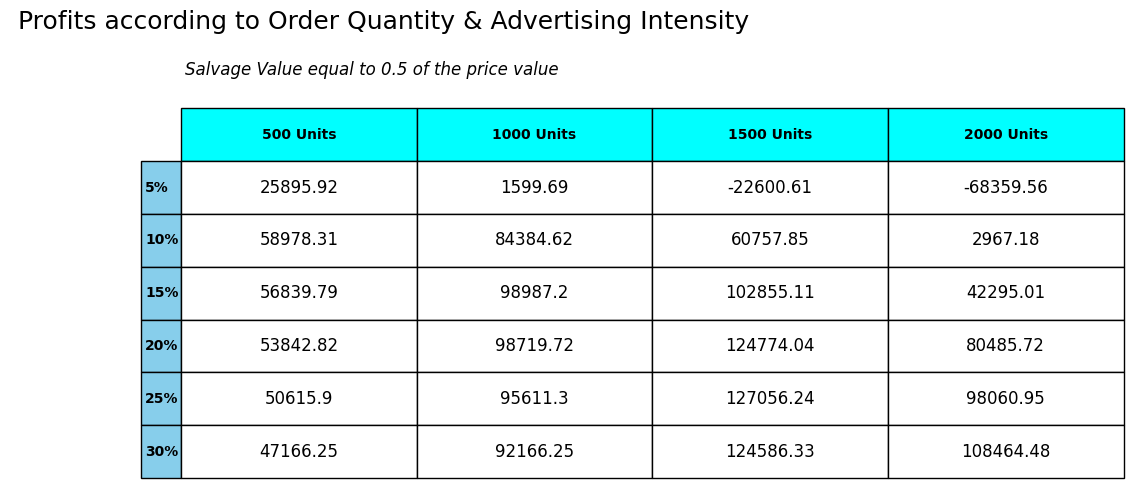

In [28]:
# We used Matplotlib to show a table with six rows and four columns for the 24-scenarios profits.

row_list = [f"{x}%"     for x in list_advert_intens]
col_list = [f"{x} Units" for x in list_of_orders]
             
subtitle_text = f"Salvage Value equal to {multiplier} of the price value"

fig, ax = plt.subplots(1,1)
ax.axis('tight')
ax.axis('off')
profits_table = ax.table(cellText  =  list_of_Means,
                         rowLabels = row_list,
                         colLabels = col_list,
                         rowColours =["skyblue"] * length1,
                         colColours =["cyan"]*length2,
                         cellLoc='center', loc="center",
                         bbox = [0.1, 0, 1.9, 1.0])
ax.set_title(" Profits according to Order Quantity & Advertising Intensity",fontsize=18, y= 1.2 , pad = 4)

plt.figtext(0.5, 0.95,
            subtitle_text,
            horizontalalignment='center',
            size= 12, style='italic',
            color='black'
           )

profits_table.auto_set_font_size(False)
profits_table.set_fontsize(12)
                
for (row, col), cell in profits_table.get_celld().items():
  if (row == 0) or (col == -1):
      cell.set_text_props(
                       fontproperties=FontProperties(weight='bold'))

plt.savefig(your_path +'Scenarios.png',bbox_inches='tight', dpi=150)
plt.show()


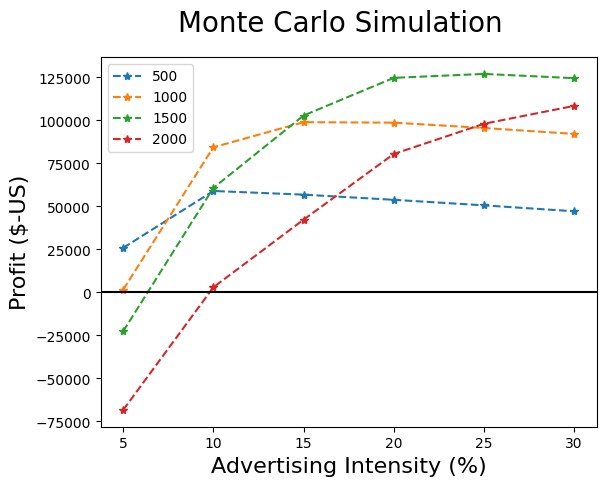

In [30]:
fig, ax = plt.subplots()
 
for i in range(len(list_of_Means[0])):
    plt.plot(list_advert_intens,[pt[i] for pt in list_of_Means],
             label = list_of_orders[i],
             linestyle='--', marker = '*')
plt.legend()
plt.axhline(y = 0.0, color = 'k', linestyle = '-')
  
fig.suptitle('Monte Carlo Simulation',  fontsize=20)
plt.xlabel('Advertising Intensity (%)', fontsize=16)
plt.ylabel('Profit ($-US)', fontsize=16)
plt.xticks()

plt.savefig(your_path +'ScenarioChart.png',
            bbox_inches='tight', dpi=150)
plt.show()

In [31]:
# Finally, we used PrettyTable for the statistic report corresponding to the scenario with the maximum profit.
max_profit = df.loc[df["Mean"].idxmax()]
         
t = PrettyTable(['Statistic', 'Value'])
t.add_row(['Runs', Number_of_Replications])
t.add_row(['Advert.Intens.',max_profit['Advert.Intens.']])
t.add_row(['Order Quantity',max_profit['Order Quantity']])
t.add_row(['Mean', max_profit['Mean']])
t.add_row(['Median', max_profit['Median']])
t.add_row(['Variance', max_profit['Var.']])
t.add_row(['Stand. Error', max_profit['Std. Error']])
t.add_row(['Skewness', max_profit['Skewness']])
t.add_row(['Kurtosis', max_profit['Kurtosis']])
t.add_row(['Half Width',max_profit['CI Half Width']])
t.add_row(['CI inf', max_profit['CI LL']])
t.add_row(['CI sup', max_profit['CI UL']])
 
print(t)

+----------------+-------------+
|   Statistic    |    Value    |
+----------------+-------------+
|      Runs      |     3000    |
| Advert.Intens. |     25.0    |
| Order Quantity |    1500.0   |
|      Mean      |  127056.24  |
|     Median     |   128115.9  |
|    Variance    | 31282738.03 |
|  Stand. Error  |    102.13   |
|    Skewness    |    -7.25    |
|    Kurtosis    |    63.97    |
|   Half Width   |    200.22   |
|     CI inf     |  126856.02  |
|     CI sup     |  127256.46  |
+----------------+-------------+
